# Content List: 

## 1. Introduction and Data Overview
   - Brief introduction to the notebook and its purpose
   - Overview of the dataset used for the analysis (NCDOT BikePedCrash.csv)

## 2. Data Preparation and Exploration
   - Loading the dataset and initial data exploration
   - Data cleaning and formatting
   - Creating a time series from the data
   - Visualizing the average bike age over time

## 3. Time Series Decomposition
   - Performing seasonal decomposition to separate trend, seasonality, and residuals
   - Visualizing the trend, seasonality, and residual components

## 4. Residual Analysis
   - Plotting the residuals to examine their behavior over time
   - Interpreting the residual plot and discussing implications

## 5. Stationarity Testing
   - Conducting the Dickey-Fuller test for stationarity
   - Interpreting the test results and concluding on the stationarity of the time series

## 6. Autocorrelation Analysis
   - Plotting the autocorrelation function (ACF) to analyze lags in the time series
   - Identifying significant lags and their potential implications

## 1. Introduction and Data Overview

In [1]:
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm # Using .api imports the public access version of statsmodels, which is a library that handles 
# statistical models.
import os
import warnings # This is a library that handles warnings.

warnings.filterwarnings("ignore") # Disable deprecation warnings that could indicate, for instance, a suspended library or 
# feature. These are more relevant to developers and very seldom to analysts.

plt.style.use('fivethirtyeight') # This is a styling option for how your plots will appear. More examples here:
# https://matplotlib.org/3.2.1/tutorials/introductory/customizing.html
# https://matplotlib.org/3.1.0/gallery/style_sheets/fivethirtyeight.html

In [2]:
# Set the file path
file_path = r'C:\Users\Ankit\OneDrive\Documents\CareerFoundry\Achievement 6\North Carolina Bike Crash Analysis\02 Data\Prepared Data\NCDOT_BikePedCrash.csv'

# Read the CSV file into a pandas DataFrame
data = pd.read_csv(file_path)

# Print the first few rows of the DataFrame to verify the import
print(data.head())


  AmbulanceR  BikeAge BikeAlcFlg         BikeDir                 BikeInjury  \
0        Yes     11.0         No    With Traffic  B: Suspected Minor Injury   
1        Yes     20.0         No  Facing Traffic         C: Possible Injury   
2        Yes     37.0         No         Unknown  B: Suspected Minor Injury   
3        Yes     30.0         No    With Traffic         C: Possible Injury   
4        Yes     45.0         No    With Traffic  B: Suspected Minor Injury   

  BikeSex          City      County CrashAlcoh CrashDay  ...   Latitude  \
0    Male        Durham      Durham         No  Tuesday  ...  36.039490   
1    Male          Cary        Wake         No   Friday  ...  35.751118   
2    Male     Stallings       Union         No   Monday  ...  35.084732   
3    Male     Salisbury       Rowan         No   Friday  ...  35.684400   
4    Male  Fayetteville  Cumberland         No   Friday  ...  34.999428   

   Longitude RdConditio    SpeedLimit                           TraffCntrl

## 2. Data Preparation and Exploration


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11044 entries, 0 to 11043
Data columns (total 31 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   AmbulanceR          11044 non-null  object 
 1   BikeAge             11044 non-null  float64
 2   BikeAlcFlg          11044 non-null  object 
 3   BikeDir             11044 non-null  object 
 4   BikeInjury          11044 non-null  object 
 5   BikeSex             11044 non-null  object 
 6   City                11044 non-null  object 
 7   County              11044 non-null  object 
 8   CrashAlcoh          11044 non-null  object 
 9   CrashDay            11044 non-null  object 
 10  CrashGrp            11044 non-null  object 
 11  CrashHour           11044 non-null  float64
 12  CrashMonth          11044 non-null  object 
 13  CrashType           11044 non-null  object 
 14  CrashYear           11044 non-null  int64  
 15  DrvrAge             11044 non-null  float64
 16  Drvr

In [4]:
data.describe()

,BikeAge,CrashHour,CrashYear,DrvrAge,Latitude,Longitude,DrvrAgeImputedFlag,BikeAgeImputedFlag,MonthCode
count,11044.000000,11044.000000,11044.000000,11044.000000,11044.000000,11044.000000,11044.000000,11044.000000,11044.000000
mean,32.526495,14.576874,2012.562206,42.038506,35.463431,-79.276781,0.139352,0.017476,6.861192
std,17.578942,4.794838,3.452374,16.108923,0.572896,1.538607,0.346329,0.131041,3.005929
min,0.000000,0.000000,2007.000000,9.000000,33.869962,-84.152986,0.000000,0.000000,1.000000
25%,18.000000,12.000000,2010.000000,29.000000,35.168739,-80.696757,0.000000,0.000000,5.000000
50%,29.000000,15.000000,2013.000000,42.038506,35.590104,-78.954483,0.000000,0.000000,7.000000
75%,48.000000,18.000000,2016.000000,52.000000,35.914741,-78.050247,0.000000,0.000000,9.000000
max,93.000000,23.000000,2018.000000,99.000000,36.555054,-75.463524,1.000000,1.000000,12.000000


In [5]:
# Convert the 'CrashDay' column back to string
data['CrashDay'] = data['CrashDay'].astype(str)


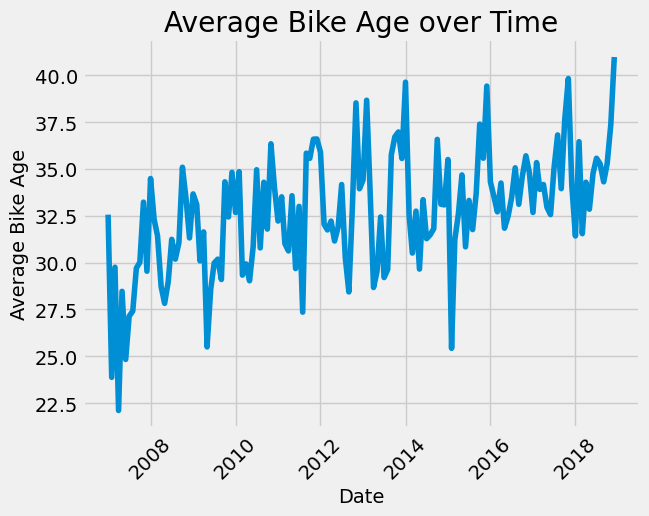

In [6]:
# Convert MonthCode and CrashYear columns to string
data['MonthCode'] = data['MonthCode'].astype(str)
data['CrashYear'] = data['CrashYear'].astype(str)

# Create a new column for the date in month-year format
data['Date'] = pd.to_datetime(data['CrashYear'] + '-' + data['MonthCode'], format='%Y-%m')

# Calculate the average bike age for each month
average_bike_age = data.groupby('Date')['BikeAge'].mean()

# Plot the time series
plt.plot(average_bike_age.index, average_bike_age.values)
plt.xlabel('Date')
plt.ylabel('Average Bike Age')
plt.title('Average Bike Age over Time')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()


## 3. Time Series Decomposition

In [7]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Perform decomposition
decomposition = seasonal_decompose(average_bike_age, model='additive')

# Retrieve the components
trend = decomposition.trend
seasonality = decomposition.seasonal
residuals = decomposition.resid

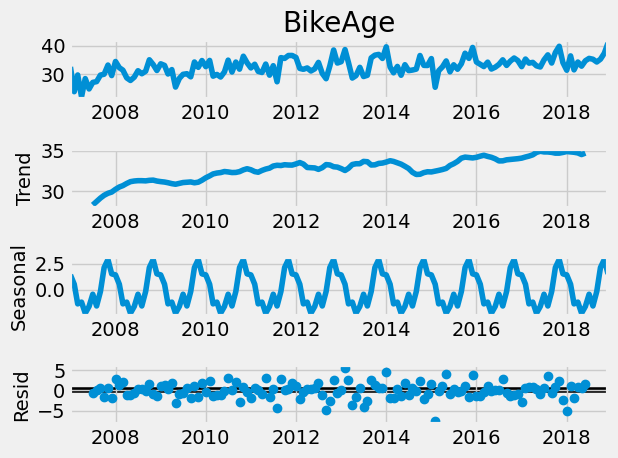

In [8]:
# Plot the separate components

decomposition.plot()
plt.show()

Trend: the trends seems to show that the average age of the bicyclist is increasing over time (most likely due to technology keeping the young people indoors)
Seasonal: It seems around spring and fall is when the young bikers are out and the summer is for the older population.
Residual: there seem to be alot of residuals

## 4. Residual Analysis

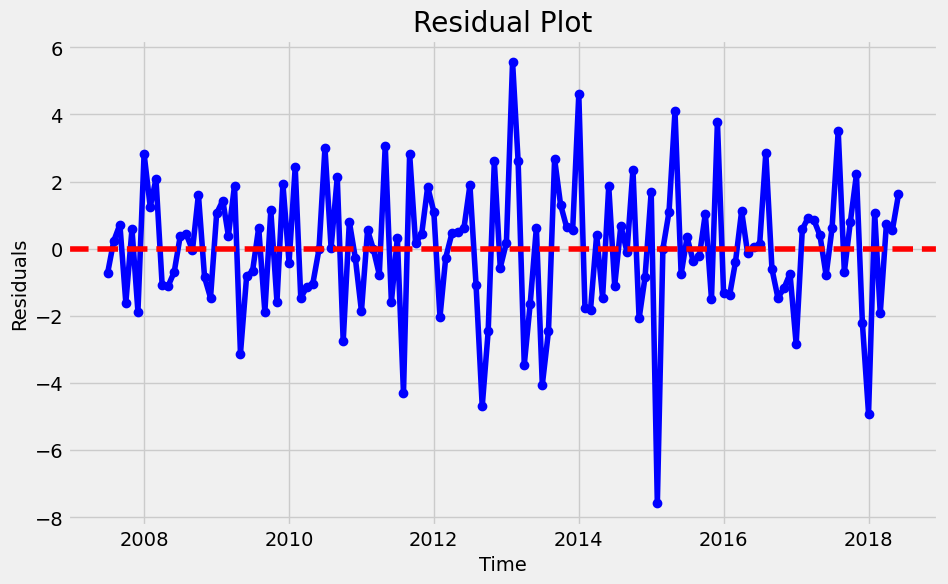

In [9]:
import matplotlib.pyplot as plt

# Plotting the residuals
plt.figure(figsize=(10, 6))
plt.plot(residuals.index, residuals, marker='o', linestyle='-', color='blue')
plt.axhline(y=0, color='red', linestyle='--')  # Add a horizontal line at y=0 for reference
plt.xlabel('Time')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.grid(True)
plt.show()


## 5. Stationarity Testing

In [10]:
from statsmodels.tsa.stattools import adfuller

# Perform Dickey-Fuller test
result = adfuller(data['BikeAge'])

# Extract and print test statistics
test_statistic = result[0]
p_value = result[1]
critical_values = result[4]

print(f'Test Statistic: {test_statistic}')
print(f'P-value: {p_value}')
print('Critical Values:')
for key, value in critical_values.items():
    print(f'  {key}: {value}')


Test Statistic: -17.823263929254075
P-value: 3.154744346106777e-30
Critical Values:
  1%: -3.4309435411873483
  5%: -2.8618023125717094
  10%: -2.566909623856641


Interpretation:

The test statistic value of -17.823263929254075 is significantly more negative than the critical values at all common significance levels (1%, 5%, and 10%). This suggests strong evidence against the null hypothesis of non-stationarity.
The p-value of 3.154744346106777e-30 is extremely small, well below any reasonable significance level. This indicates strong evidence to reject the null hypothesis and suggests that the time series is stationary.
The critical values provide thresholds for determining stationarity. Since the test statistic is more negative than the critical values, it further supports the rejection of the null hypothesis.
In conclusion, based on the Dickey-Fuller test results, we can reject the null hypothesis of non-stationarity and conclude that the time series is stationary. The data exhibits stationarity characteristics, which is important for time series analysis as it allows us to apply various statistical models and techniques that assume stationarity.

## 6. Autocorrelation Analysis

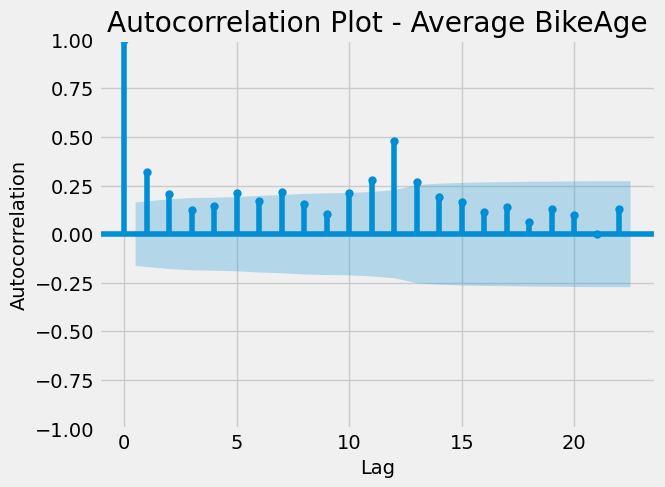

In [11]:
from statsmodels.graphics.tsaplots import plot_acf

# Calculate the average of the variable BikeAge
average_bike_age = data.groupby(['MonthCode', 'CrashYear'])['BikeAge'].mean()

# Plot autocorrelation
plot_acf(average_bike_age)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation Plot - Average BikeAge')
plt.show()
